# Name : Arshia Gururaj Pelathur

# Batch : July 2021

# Domain : Data Science and Business Analytics 

## Task 2: Unsupervised Machine Learning

<b>Objective : </b>In this task, we will be using the iris dataset, to predict the optimum number of clusters.

### Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet,cut_tree,fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

### Loading Iris Data

In [62]:
df = pd.read_csv('iris_data.csv')
df.head(10)

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [63]:
df.shape

(150, 5)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal Length (cm)  150 non-null    float64
 1   Sepal Width (cm)   150 non-null    float64
 2   Petal Length (cm)  150 non-null    float64
 3   Petal Width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are 4 numerical features : sepal length, sepal width, petal length and petal width
There is 1 categorical features : flowe species

In [65]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

#### Missing values

In [66]:
df.isnull().sum()

Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Species              0
dtype: int64

#### Skewness

In [67]:
df.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


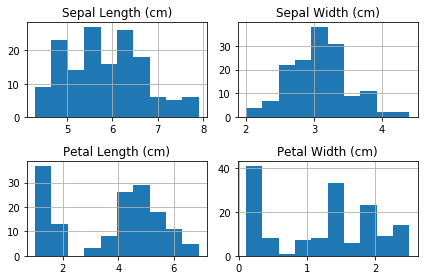

Skewness:


Sepal Length (cm)    0.314911
Sepal Width (cm)     0.334053
Petal Length (cm)   -0.274464
Petal Width (cm)    -0.104997
dtype: float64

In [68]:
df.hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df.skew()

#### Visualizing Outliers

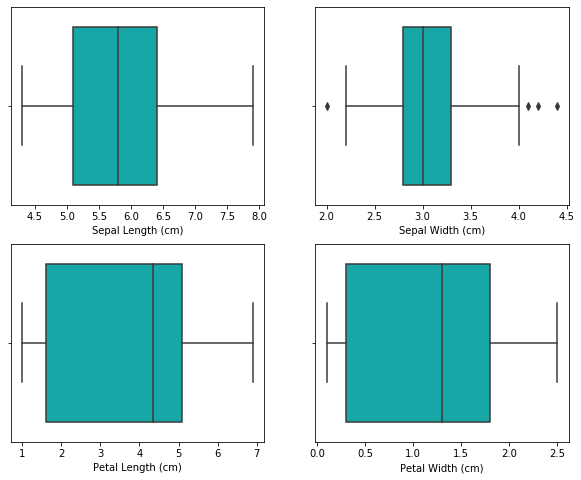

In [69]:
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for variable, subplot in zip(df.columns, ax.flatten()):
    z = sns.boxplot(x = df[variable], orient = "h", whis=1.5 , ax=subplot, color='c') 
    z.set_xlabel(variable, fontsize = 10)   


In [70]:
df.groupby(["Species"]).mean()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [71]:
X = df.drop('Species',axis=1)
X.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Finding the optimum number of clusters

The optimal K value can be found using 2 methods:
-  Within Cluster Sum of Square or ssd
-  Silhouette Score

#### WCSS:

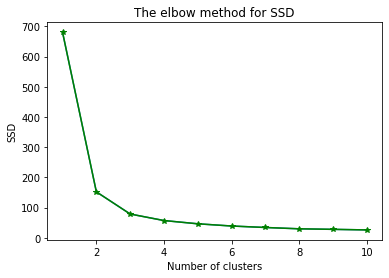

In [72]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

ssd = []

for k in range(1, 11):
    km = KMeans(n_clusters = k, random_state = 88)
    km.fit(X)
    ssd.append(km.inertia_)
    
# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1,11),ssd)
plt.plot(range(1, 11), ssd,c='g',marker='*')
plt.title('The elbow method for SSD')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show();

In [73]:
print('The sum of square distances are: \n')
ssd

The sum of square distances are: 



[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 39.20485962280962,
 34.32042673992674,
 29.961863114955225,
 28.1629418930506,
 26.296512322472857]

#### Silhouette Score:

In [74]:
from sklearn.metrics import silhouette_score

sil_score=[]

for k in range(2,11):
    km = KMeans(n_clusters = k, random_state = 88)
    km.fit(X)
    pred = km.labels_
    ss = silhouette_score(X,pred,random_state=88)
    sil_score.append(ss)
    
sil_score

[0.6808136202936816,
 0.5525919445499757,
 0.4978256901095472,
 0.4885175508886279,
 0.37038030962207763,
 0.35606622424763773,
 0.36346472777667044,
 0.34521612500962673,
 0.3140501251815531]

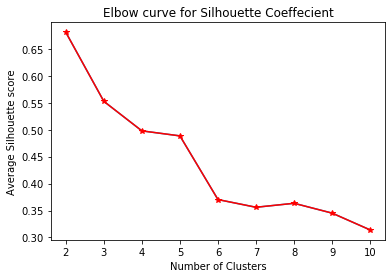

In [75]:
plt.plot(range(2,11),sil_score)
plt.plot(range(2,11),sil_score, c='r',marker='*')
plt.title('Elbow curve for Silhouette Coeffecient')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette score')
plt.show()

From silhouette score and ssd we get optimal clusters as 3. 

#### Clustering using 3 clusters:

In [76]:
# Applying kmeans to the data

km = KMeans(n_clusters = 3, random_state = 88)
km.fit(X)
pred = km.labels_
pred = pd.Series(pred.reshape(-1,))
y_kmeans = km.fit_predict(X)
pred.value_counts()


2    62
1    50
0    38
dtype: int64

In [77]:
# creating a new dataframe containing the clustered data
df1 = X.copy()
df1['cluster'] = pred
df1.head(10)

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [78]:
df.groupby(["Species"]).mean()


,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [79]:
df1.groupby(["cluster"]).mean()


,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
cluster,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871


cluster 0 resembles 'Iris-Virginica' flower species

cluster 1 resembles 'Iris-Setosa' flower species

cluster 2 resembles 'Iris-Versicolor' flower species


#### Visualising the clusters 

In [80]:
X.columns

Index(['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)',
       'Petal Width (cm)'],
      dtype='object')

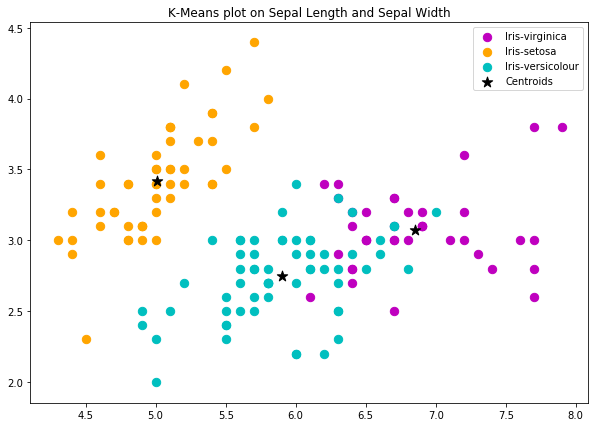

In [81]:
plt.figure(figsize=(10,7))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 70, c = 'm', label = 'Iris-virginica')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 70, c = 'orange', label = 'Iris-setosa')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1],s = 70, c = 'c', label = 'Iris-versicolour')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 120, c = 'black',marker='*', label = 'Centroids')

plt.title("K-Means plot on Sepal Length and Sepal Width")
plt.legend()
plt.show()

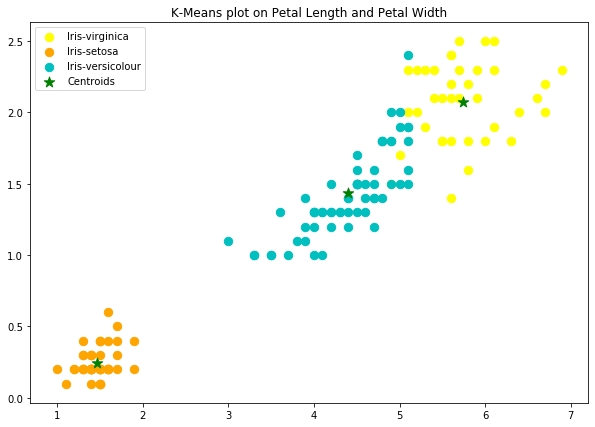

In [82]:
plt.figure(figsize=(10,7))
plt.scatter(X.iloc[y_kmeans == 0, 2], X.iloc[y_kmeans == 0, 3], s = 70, c = 'yellow', label = 'Iris-virginica')
plt.scatter(X.iloc[y_kmeans == 1, 2], X.iloc[y_kmeans == 1, 3], s = 70, c = 'orange', label = 'Iris-setosa')
plt.scatter(X.iloc[y_kmeans == 2, 2], X.iloc[y_kmeans == 2, 3],s = 70, c = 'c', label = 'Iris-versicolour')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s = 120, c = 'green',marker='*', label = 'Centroids')

plt.title("K-Means plot on Petal Length and Petal Width")
plt.legend()
plt.show()

# Conclusion

### **From above 2 scatter plots we can see that the clustering is good. So, the optimal number of clusters is 3**